## imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## Dataset Loading

In [2]:
df = pd.read_csv("spam.csv", encoding="Windows-1252")


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing

In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


 have noticed that unnamed2,3,4 column have very less entries and so tese are not important columns and I can remove them

In [5]:
df.drop(columns =["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace =True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


checking for missing values nad duplicate values

In [6]:
print("missing values : ",df.isnull().sum())
print("duplicated values : ",df.duplicated().sum())

missing values :  v1    0
v2    0
dtype: int64
duplicated values :  403


removing duplicated values

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Changing column names as current names are not descriptive

In [8]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


converting target variable to numeric data

## Data Transformation

In [10]:
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## Data Visualization

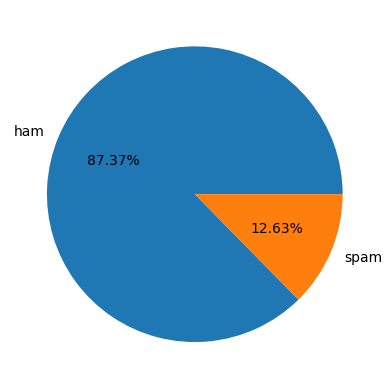

In [12]:
plt.pie(df["target"].value_counts(),labels = ['ham','spam'],autopct = "%0.2f%%")
plt.show()

it shows that there is class imbalanced as ham is  87.37% and spam is only 12.63%

In [13]:
df['num_characters'] = df["text"].apply(len)

In [14]:
df['num_words']=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df['num_sentences']=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
print("for ham messages")
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

for ham messages


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
print("for apam messages")
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

for apam messages


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


I analyzed that normally in spam mesages no of chracters,words are greater as compared to ham

<Axes: xlabel='num_characters', ylabel='Count'>

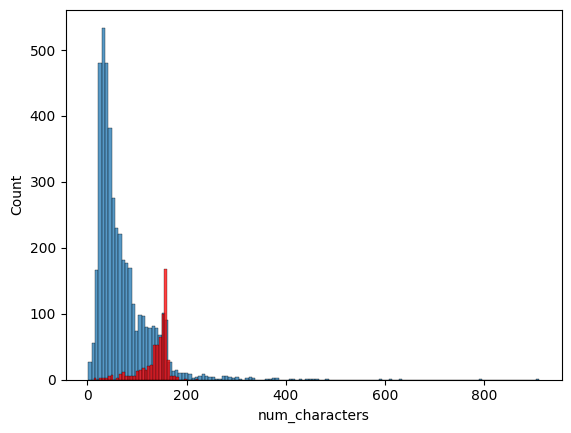

In [19]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

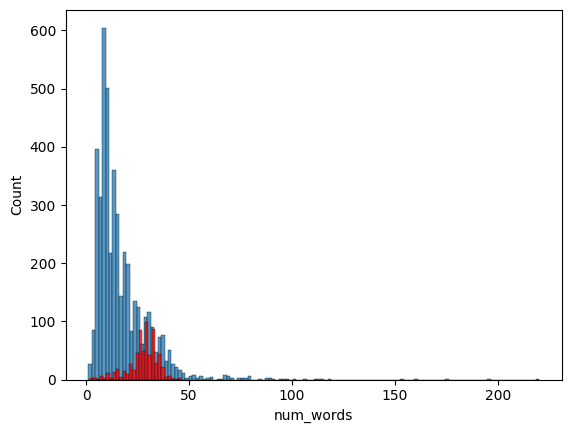

In [20]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

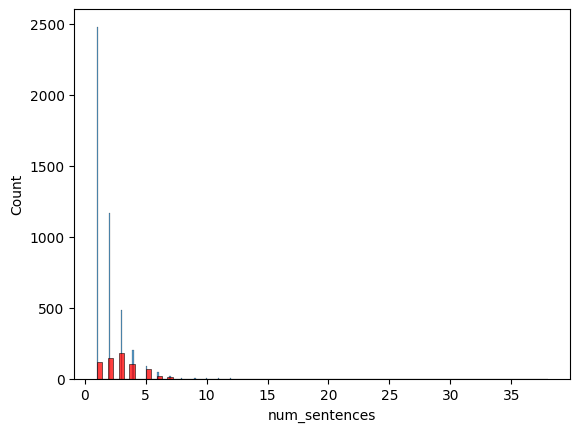

In [21]:
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color='red')

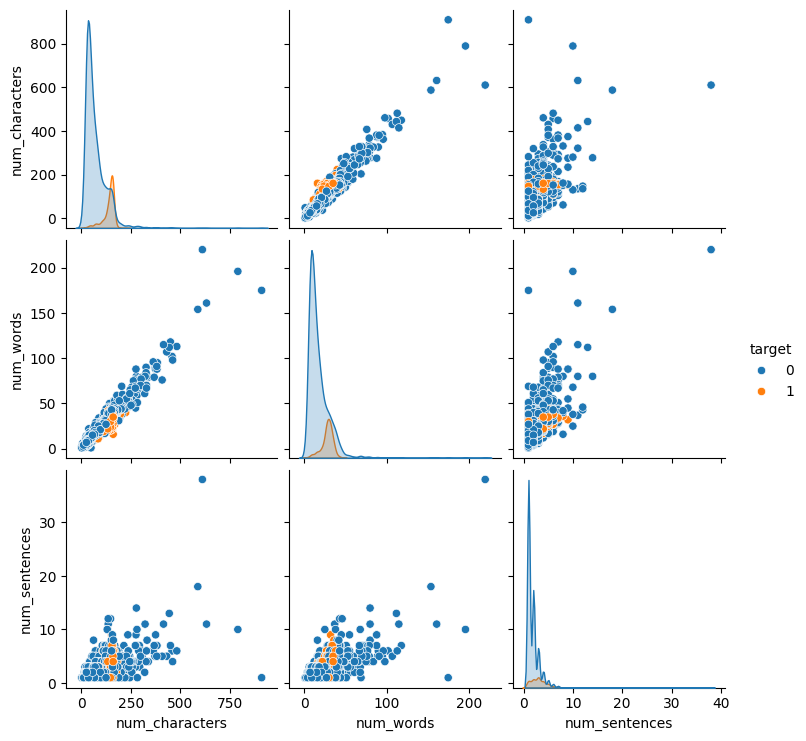

In [22]:
sns.pairplot(df,hue='target')

## Text Preprocessing

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem.porter import PorterStemmer

In [25]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)
    text =y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in punctuation:
            y.append(word)
    text =y[:]
    y.clear()
    ps = PorterStemmer()
    for word in text:

        y.append(ps.stem(word))
            
    return " ".join(y)
    
    

    return y

In [ ]:
import pickle
with open('transform_text.pkl', 'wb') as f:
    pickle.dump(transform_text, f)

In [26]:
transform_text("Hi I loving am goo.?  . 'a'  #2 34")

'hi love 2 34'

In [27]:
df["transformed_text"]=df["text"].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
from wordcloud import WordCloud

In [29]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

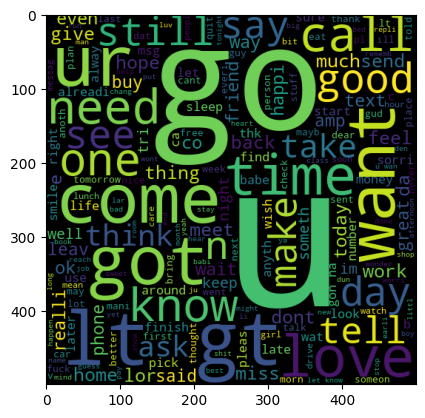

In [30]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=""))
plt.imshow(ham_wc)

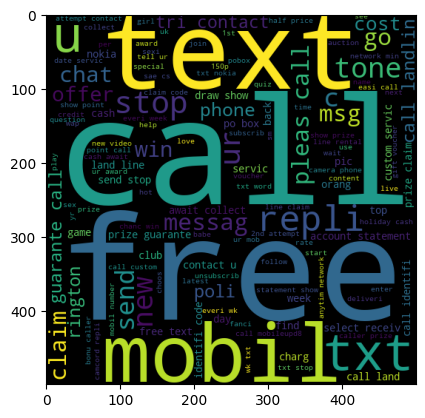

In [31]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=""))
plt.imshow(spam_wc)

## Model Buidling

In [32]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
X= df["transformed_text"]
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =2)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [36]:
print(X_train.shape)
print(X_test.shape)

(4135, 5921)
(1034, 5921)


## Feature Extraction

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=1000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [38]:
from  sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [39]:
gnb = GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

## Training

In [40]:
gnb.fit(X_train,y_train)



GaussianNB()

## Prediction and Evaluation

In [41]:
pred_1 = gnb.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,pred_1))
print("precision score : ",precision_score(y_test,pred_1))

accuracy score :  0.9642166344294004
precision score :  0.8531468531468531


In [42]:
mnb.fit(X_train,y_train)
pred_2= mnb.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,pred_2))
print("precision score : ",precision_score(y_test,pred_2))


accuracy score :  0.9729206963249516
precision score :  0.9166666666666666


In [43]:
bnb.fit(X_train,y_train)
pred_3 = bnb.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,pred_3))
print("precision score : ",precision_score(y_test,pred_3))


accuracy score :  0.9825918762088974
precision score :  1.0


In [44]:
X= df["transformed_text"]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =2)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [70]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=1000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [71]:
gnb = GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
pred_1 = gnb.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,pred_1))
print("precision score : ",precision_score(y_test,pred_1))


accuracy score :  0.9671179883945842
precision score :  0.8714285714285714


In [73]:
mnb.fit(X_train,y_train)
pred_2 = mnb.predict(X_test)
print("accuracy score : ",accuracy_score(y_test,pred_2))
print("precision score : ",precision_score(y_test,pred_2))


accuracy score :  0.9709864603481625
precision score :  1.0


## Training Time and error rate and evaluation of selected model

In [74]:
import time
start_pred = time.time()
bnb.fit(X_train,y_train)  
end_pred = time.time()
prediction_time = end_pred - start_pred
print("training time : ",prediction_time)
pred_3 = bnb.predict(X_test)
accuracy = accuracy_score(y_test,pred_3)
print("accuracy score : ",accuracy)
error_rate = 1 - accuracy
print("error rate : ",error_rate)
print("precision score : ",precision_score(y_test,pred_3))


training time :  0.1641395092010498
accuracy score :  0.9854932301740812
error rate :  0.014506769825918808
precision score :  1.0


using tfidf vectorizer I found that multinomial naive bayes is better because dataset is imbalanced with repect to target classes apam and ham, so here precision matters moret than accuracy. We want to reduce false positive 

## trying some other algorithms

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [76]:
dtc =DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'decisionTree':dtc,
    'kNeighbours':knc,
    'randForest':rfc,
    "bernouliNaiveBayes":bnb
}

In [78]:
acc_scores = []
prec_scores = []
def train_classifiers(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    current_acc_score = accuracy_score(y_test,pred)
    current_prec_score = precision_score(y_test,pred)
    return current_acc_score,current_prec_score

    

## Compairing different Algorithms

In [79]:
for name,clf in clfs.items():
    current_acc_score,current_prec_score=train_classifiers(clf,X_train,X_test,y_train,y_test)
    print("classifier : ",name)
    print("accuracy : ",current_acc_score)
    print("precision : ",current_prec_score)
    acc_scores.append(current_acc_score)
    prec_scores.append(current_prec_score)


classifier :  decisionTree
accuracy :  0.9284332688588007
precision :  0.8636363636363636
classifier :  kNeighbours
accuracy :  0.9052224371373307
precision :  1.0
classifier :  randForest
accuracy :  0.9748549323017408
precision :  0.9827586206896551
classifier :  bernouliNaiveBayes
accuracy :  0.9854932301740812
precision :  1.0


if we analyze all of these than bernoulli naive bayes is best among these for current dataset having 
accuracy score :  0.9806576402321083
precision score :  1.0


In [80]:
output = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_scores,'Precision':prec_scores})
output

,Algorithm,Accuracy,Precision
0,decisionTree,0.928433,0.863636
1,kNeighbours,0.905222,1.000000
2,randForest,0.974855,0.982759
3,bernouliNaiveBayes,0.985493,1.000000


In [81]:
performance_df =pd.melt(output,id_vars="Algorithm")

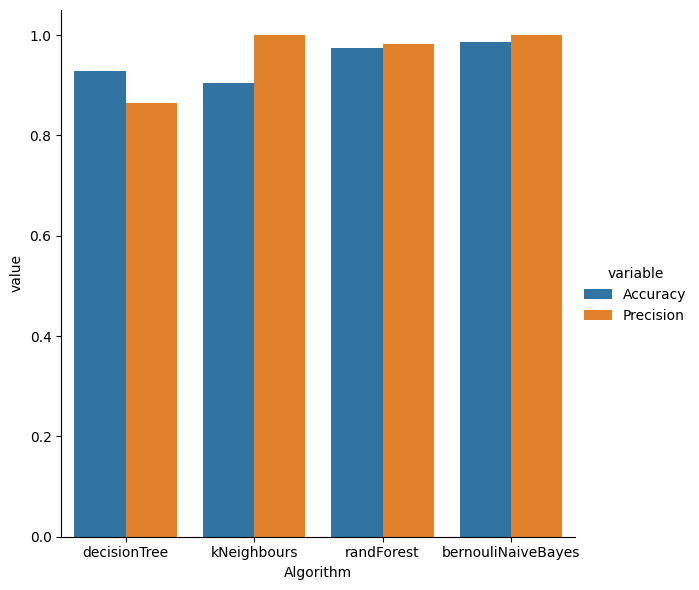

In [82]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df,kind="bar",height=6)

In [83]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(bnb,open("model.pkl","wb"))